# Veri Seti Hakkında
Kullanılan veri seti Kaggle’dan alınmıştır. Küresel verilerin yanı sıra ülkeye ve şehre göre verileri içerir. 1750'lerden 2013 yılına kadar ölçülen arazi sıcaklıklarını içeriyor. Lawrence Berkeley Ulusal Laboratuvarı’na bağlı Berkeley Earth tarafından bir araya getirilen veri setinde 

**Değişkenler**
* dt — Ortalama sıcaklığın ölçüldüğü tarih

* AverageTemperature — Santigrat cinsinden küresel ortalama sıcaklık

* AverageTemperatureUncertainty— Ortalama %95 civarında güven aralığı

* City— Ölçümün yapıldığı şehir

* Country— Ölçümün yapıldığı ülke

* Latitude — Enlem

* Longitude—Boylam

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [224]:
df = pd.read_csv("GlobalLandTemperaturesByCity.csv", parse_dates=["dt"])
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [226]:
def check_df(dataframe, head=5):         
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### İnfo #####################")
    print(dataframe.info())
    print("##################### NA #####################")
    print(dataframe.isnull().sum())
    print("##################### Quantiles #####################")
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(8599212, 7)
##################### Types #####################
dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
City                                     object
Country                                  object
Latitude                                 object
Longitude                                object
dtype: object
##################### İnfo #####################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8599212 entries, 0 to 8599211
Data columns (total 7 columns):
 #   Column                         Dtype         
---  ------                         -----         
 0   dt                             datetime64[ns]
 1   AverageTemperature             float64       
 2   AverageTemperatureUncertainty  float64       
 3   City                           object        
 4   Country                        object        
 5   Latitude      

* Veride veri kayıplarının doğru şekilde düzenlenmesi veya silinmesi için veri kayıplarının yüzdesini gözlemleyip, buna göre karar verelim. Boş değerlerinin toplamını, toplam satır sayısına bölüp ve yüz ile çarpımından elde edebilir.

In [228]:
df.isna().sum() / df.shape[0] * 100

dt                               0.0
AverageTemperature               0.0
AverageTemperatureUncertainty    0.0
City                             0.0
Country                          0.0
Latitude                         0.0
Longitude                        0.0
dtype: float64

In [229]:
df.dropna(inplace=True) 

In [173]:
df.shape

(8235082, 7)

In [10]:
df.any().isna()

dt                               False
AverageTemperature               False
AverageTemperatureUncertainty    False
City                             False
Country                          False
Latitude                         False
Longitude                        False
dtype: bool

* Veri setinde kaç tane ülke olduğunu sorgulamak için.

In [12]:
df["Country"].nunique() 

159

* Veri setinde ülkelere ait kaç adet veri olduğunu sorgulamak için.  Ayrıca "Length" kısmından da kaç ülke olduğunu görebiliriz.

In [212]:
df["Country"].value_counts()

India               960548
China               819132
United States       661524
Brazil              451645
Russia              448663
                     ...  
Burundi               1675
Eritrea               1669
Djibouti              1658
Oman                  1652
Papua New Guinea      1580
Name: Country, Length: 159, dtype: int64

* Veri setinde ölçülen tüm ortalama sıcaklıkları kullanarak küresel ısınmanın nasıl bir yükselişte olduğunu incelemeye çalışalım. Bunun için 1800 den itibaren bütün verileri ele alacağız.

In [239]:
gl_data = df[df["dt"]>"01.01.1800"]
gl_data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
675,1800-02-01,-2.071,5.420,Århus,Denmark,57.05N,10.33E
676,1800-03-01,-2.320,4.923,Århus,Denmark,57.05N,10.33E
677,1800-04-01,8.035,2.634,Århus,Denmark,57.05N,10.33E
678,1800-05-01,12.313,1.530,Århus,Denmark,57.05N,10.33E
679,1800-06-01,12.283,2.118,Århus,Denmark,57.05N,10.33E


In [240]:
gl_data_means = gl_data.groupby(gl_data["dt"].dt.to_period("Y")).mean()
gl_data_means = gl_data_means.reset_index() 
gl_data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             214 non-null    period[A-DEC]
 1   AverageTemperature             214 non-null    float64      
 2   AverageTemperatureUncertainty  214 non-null    float64      
dtypes: float64(2), period[A-DEC](1)
memory usage: 5.1 KB


In [241]:
gl_data_means["dt"] = gl_data_means["dt"].astype("str").astype("datetime64")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

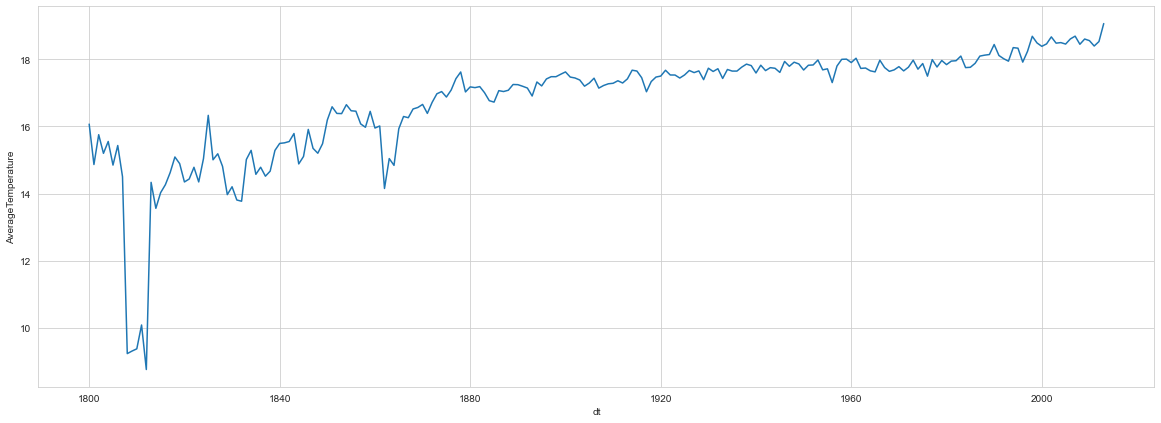

In [242]:
plt.figure(figsize=(20,7))
sns.lineplot(data=gl_data_means, x="dt",y="AverageTemperature")

In [213]:
dff = df[df["Country"].isin(["Turkey","Russia","Brazil","United Kingdom"])]

Brazil            451645
Russia            448663
United Kingdom    215288
Turkey            147086
Name: Country, dtype: int64

In [214]:
dff["Country"].value_counts()

Brazil            451645
Russia            448663
United Kingdom    215288
Turkey            147086
Name: Country, dtype: int64

In [215]:
dff.groupby(by="Country")["AverageTemperature","AverageTemperatureUncertainty"].agg(["min","mean","max"]).T

Country                                Brazil     Russia     Turkey  \
AverageTemperature            min    9.591000 -42.704000 -15.353000   
                              mean  21.902763   3.347268  12.951888   
                              max   30.495000  29.253000  32.885000   
AverageTemperatureUncertainty min    0.040000   0.057000   0.056000   
                              mean   0.869764   1.365189   1.275864   
                              max    5.277000  13.325000   9.237000   

Country                             United Kingdom  
AverageTemperature            min        -4.470000  
                              mean        9.098373  
                              max        20.743000  
AverageTemperatureUncertainty min         0.058000  
                              mean        1.592418  
                              max        13.560000

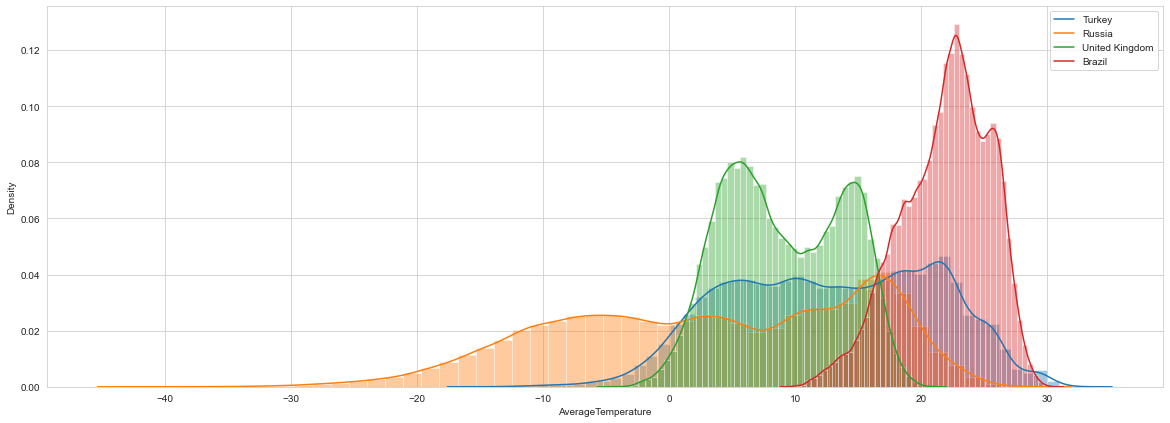

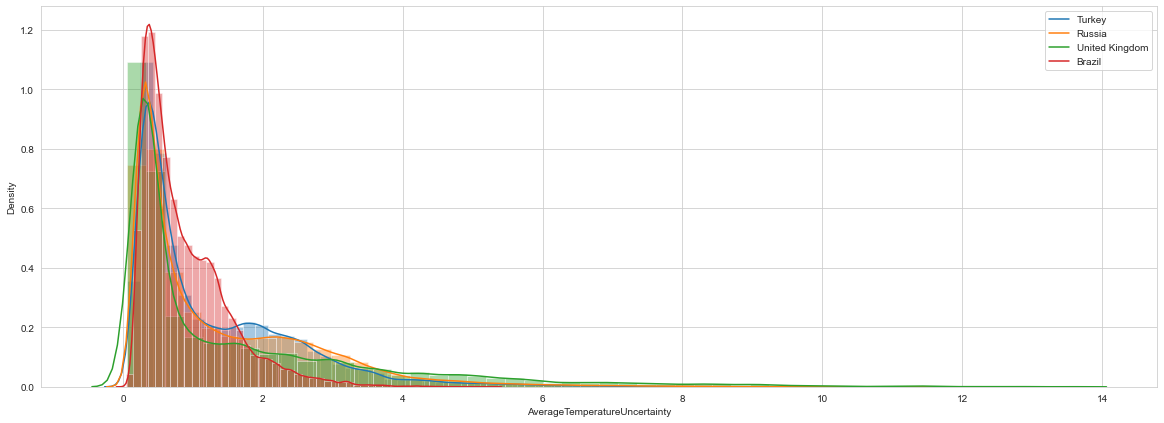

In [217]:
columns = dff.columns[1:3]
countries = dff["Country"].unique()

for column in columns:
    plt.figure(figsize=(20,7))
    for countrie in countries:
        sns.distplot(dff[dff["Country"] == countrie ][column])
        plt.legend(countries)
    plt.show() 

In [218]:
since_1800 = dff[dff["dt"]>"01.01.1800"]
since_1800.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3914,1800-02-01,5.535,3.371,Çorlu,Turkey,40.99N,27.69E
3915,1800-03-01,4.562,2.555,Çorlu,Turkey,40.99N,27.69E
3916,1800-04-01,14.348,1.972,Çorlu,Turkey,40.99N,27.69E
3917,1800-05-01,16.798,1.782,Çorlu,Turkey,40.99N,27.69E
3918,1800-06-01,20.193,1.735,Çorlu,Turkey,40.99N,27.69E


In [129]:
data_means = since_1800.groupby([since_1800["dt"].dt.to_period("Y"),"Country"]).mean()
data_means = data_means.reset_index() 
data_means["dt"] = data_means["dt"].astype("str").astype("datetime64")
data_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             829 non-null    datetime64[ns]
 1   Country                        829 non-null    object        
 2   AverageTemperature             829 non-null    float64       
 3   AverageTemperatureUncertainty  829 non-null    float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 26.0+ KB


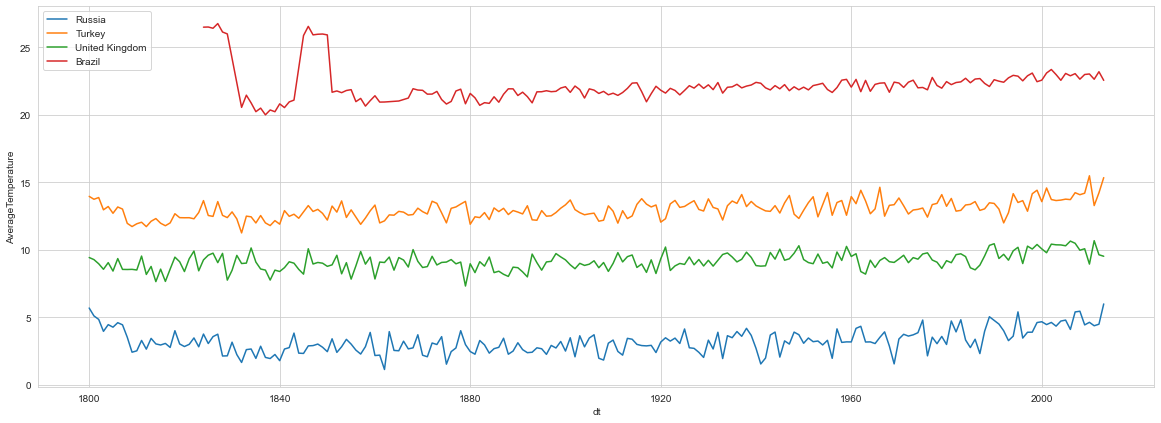

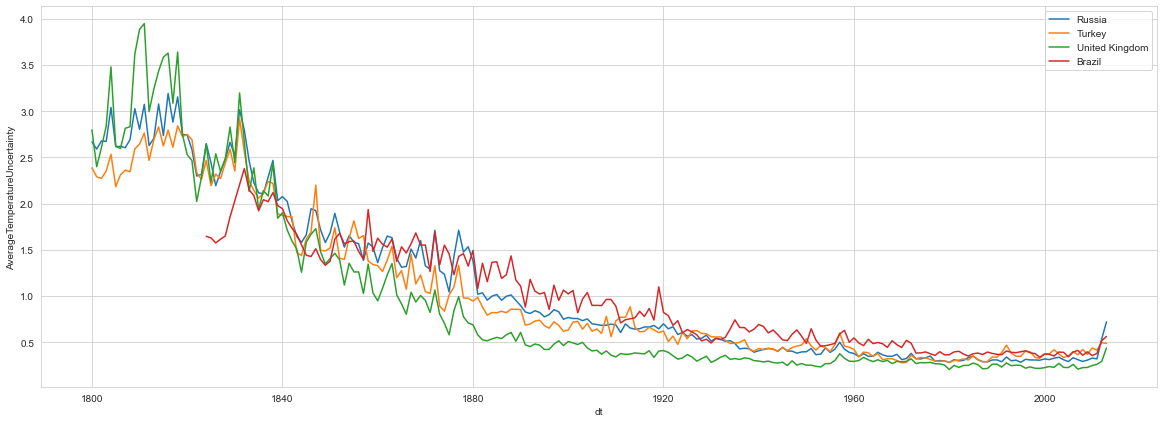

In [220]:
for col in data_means.columns[2:4]:
    sns.set_style("whitegrid") 
    plt.figure(figsize=(20,7))

    for countrie in data_means["Country"].unique():
        data = data_means[data_means["Country"]== countrie ]
        sns.lineplot(data = data, x="dt", y=col)
        plt.legend(data_means["Country"].unique())
    plt.show()  

# Türkiye'deki verilere bir göz atalım

In [180]:
data_tr = df[df["Country"]== "Turkey"]
data_tr

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E
...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E


In [181]:
data_tr['dt']=pd.to_datetime(data_tr['dt'], format='%Y%m%d', errors='ignore')
data_tr['Year']=pd.DatetimeIndex(data_tr['dt']).year
data_tr

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
3239,1743-11-01,10.013,2.291,Çorlu,Turkey,40.99N,27.69E,1743
3244,1744-04-01,13.685,2.162,Çorlu,Turkey,40.99N,27.69E,1744
3245,1744-05-01,15.021,1.824,Çorlu,Turkey,40.99N,27.69E,1744
3246,1744-06-01,19.663,1.701,Çorlu,Turkey,40.99N,27.69E,1744
3247,1744-07-01,22.314,1.648,Çorlu,Turkey,40.99N,27.69E,1744
...,...,...,...,...,...,...,...,...
8585429,2013-04-01,11.876,0.293,Zonguldak,Turkey,40.99N,31.95E,2013
8585430,2013-05-01,17.662,0.196,Zonguldak,Turkey,40.99N,31.95E,2013
8585431,2013-06-01,19.818,0.344,Zonguldak,Turkey,40.99N,31.95E,2013
8585432,2013-07-01,21.343,0.288,Zonguldak,Turkey,40.99N,31.95E,2013


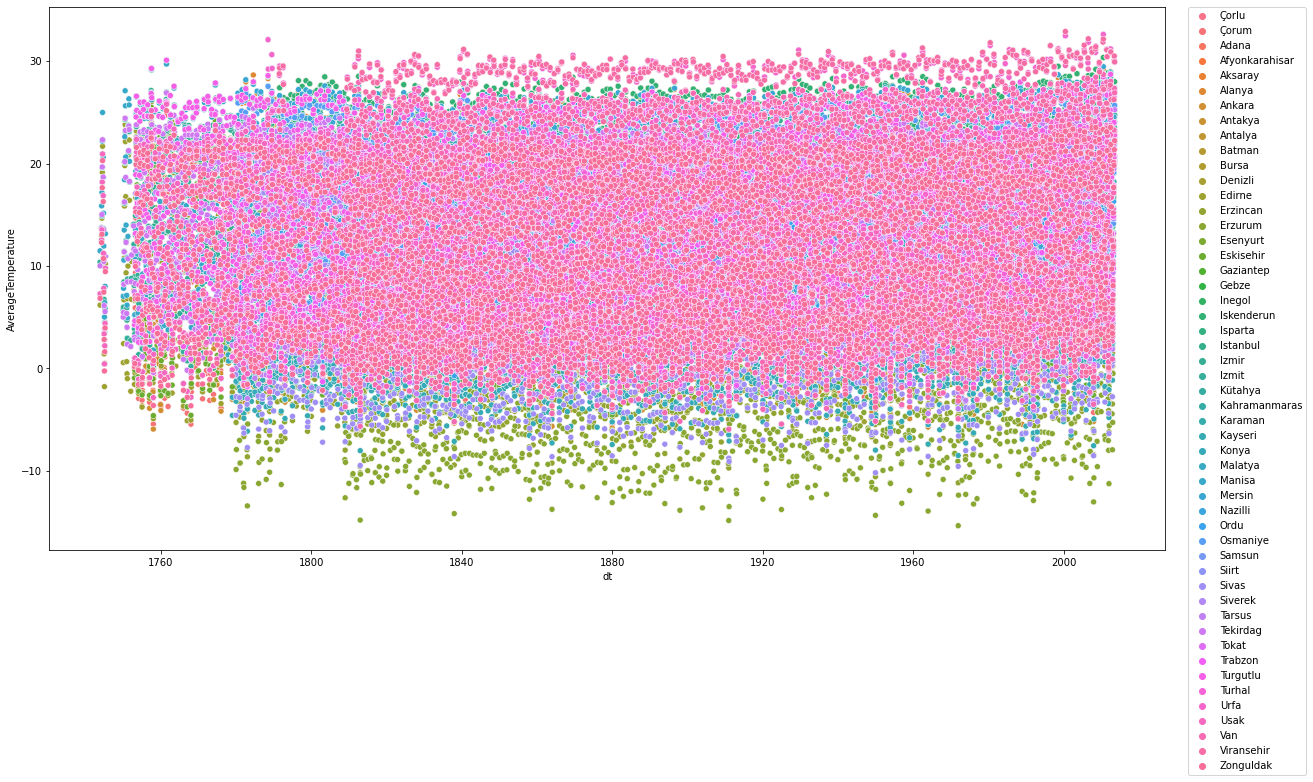

In [135]:
plt.figure(figsize=(20,10))
sns.scatterplot(x="dt",y="AverageTemperature",data=data_tr,hue="City")
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);


In [136]:
data_tr_means = data_tr.groupby(data_tr["dt"].dt.to_period("Y")).mean()
data_tr_means = data_tr_means.reset_index() 
data_tr_means.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             267 non-null    period[A-DEC]
 1   AverageTemperature             267 non-null    float64      
 2   AverageTemperatureUncertainty  267 non-null    float64      
 3   Year                           267 non-null    float64      
dtypes: float64(3), period[A-DEC](1)
memory usage: 8.5 KB


In [137]:
data_tr_means["dt"] = data_tr_means["dt"].astype("str").astype("datetime64")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

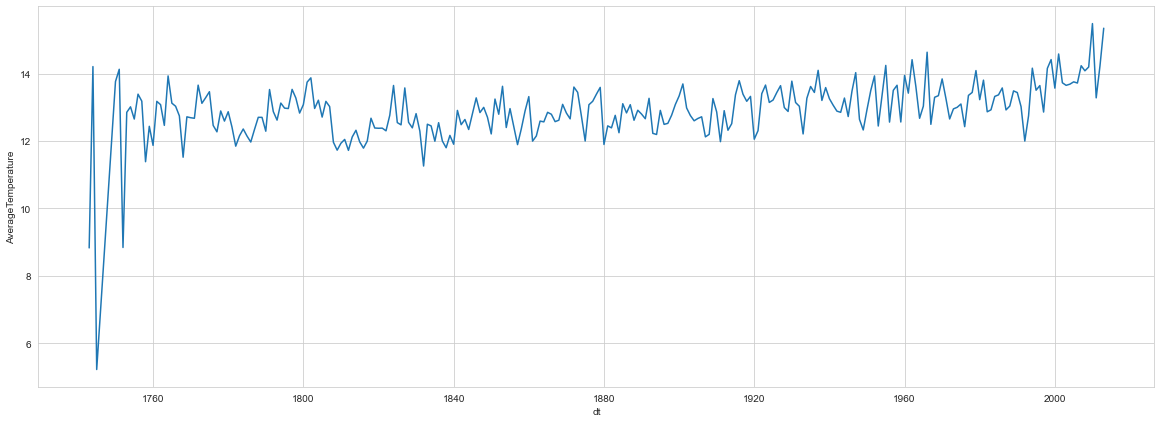

In [185]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid") 

sns.lineplot(data= data_tr_means, x="dt",y="AverageTemperature")

In [157]:
data_tr_istanbul = data_tr[data_tr["City"] == "Istanbul"]
data_tr_istanbul

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
3256834,1743-11-01,10.365,2.325,Istanbul,Turkey,40.99N,29.82E,1743
3256839,1744-04-01,13.736,2.211,Istanbul,Turkey,40.99N,29.82E,1744
3256840,1744-05-01,14.893,1.835,Istanbul,Turkey,40.99N,29.82E,1744
3256841,1744-06-01,19.614,1.705,Istanbul,Turkey,40.99N,29.82E,1744
3256842,1744-07-01,22.221,1.692,Istanbul,Turkey,40.99N,29.82E,1744
...,...,...,...,...,...,...,...,...
3260067,2013-04-01,13.260,0.503,Istanbul,Turkey,40.99N,29.82E,2013
3260068,2013-05-01,19.384,0.273,Istanbul,Turkey,40.99N,29.82E,2013
3260069,2013-06-01,21.853,0.504,Istanbul,Turkey,40.99N,29.82E,2013
3260070,2013-07-01,23.553,0.515,Istanbul,Turkey,40.99N,29.82E,2013


In [158]:
data_tr_istanbul.groupby(by="City")["AverageTemperature","AverageTemperatureUncertainty"].agg(["min","mean","max"])

AverageTemperature                    AverageTemperatureUncertainty  \
                        min       mean     max                           min   
City                                                                           
Istanbul              -0.09  13.507409  26.954                         0.083   

                           
              mean    max  
City                       
Istanbul  1.444198  8.302

In [159]:
data_tr_istanbul_means = data_tr_istanbul.groupby(data_tr_istanbul["dt"].dt.to_period("Y")).mean()
data_tr_istanbul_means = data_tr_istanbul_means.reset_index() 
data_tr_istanbul_means.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype        
---  ------                         --------------  -----        
 0   dt                             267 non-null    period[A-DEC]
 1   AverageTemperature             267 non-null    float64      
 2   AverageTemperatureUncertainty  267 non-null    float64      
 3   Year                           267 non-null    float64      
dtypes: float64(3), period[A-DEC](1)
memory usage: 8.5 KB


In [160]:
data_tr_istanbul_means["dt"] = data_tr_istanbul_means["dt"].astype("str").astype("datetime64")

<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

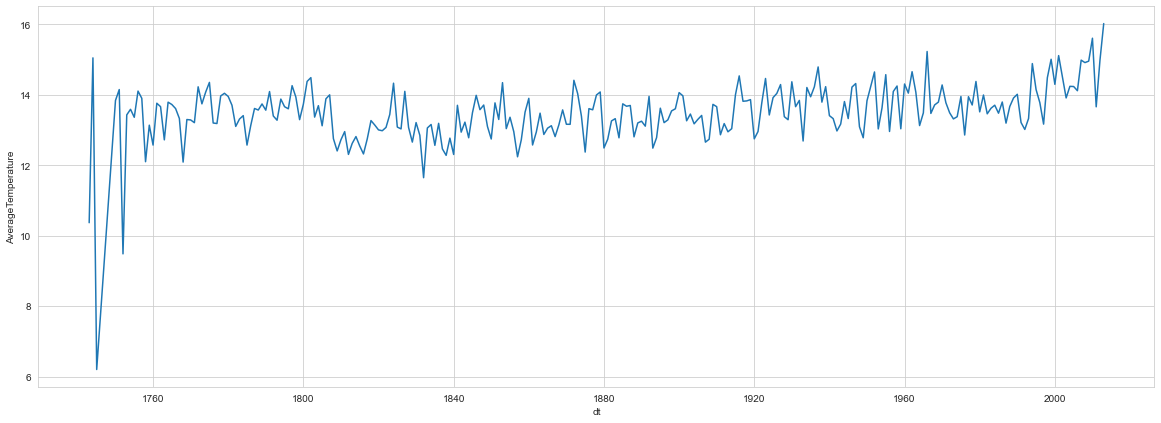

In [186]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid") 

sns.lineplot(data= data_tr_istanbul_means, x="dt",y="AverageTemperature")

In [162]:
data_tr_ant = data_tr[data_tr["City"] == "Antalya"]
data_tr_ant

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
329309,1774-01-01,0.034,5.410,Antalya,Turkey,37.78N,30.51E,1774
329310,1774-02-01,4.320,5.031,Antalya,Turkey,37.78N,30.51E,1774
329311,1774-03-01,6.733,2.649,Antalya,Turkey,37.78N,30.51E,1774
329312,1774-04-01,12.666,3.803,Antalya,Turkey,37.78N,30.51E,1774
329313,1774-05-01,19.183,2.073,Antalya,Turkey,37.78N,30.51E,1774
...,...,...,...,...,...,...,...,...
332180,2013-04-01,11.981,0.439,Antalya,Turkey,37.78N,30.51E,2013
332181,2013-05-01,17.690,0.316,Antalya,Turkey,37.78N,30.51E,2013
332182,2013-06-01,20.636,0.109,Antalya,Turkey,37.78N,30.51E,2013
332183,2013-07-01,23.139,0.457,Antalya,Turkey,37.78N,30.51E,2013


In [163]:
data_tr_ant.groupby(by="City")["AverageTemperature","AverageTemperatureUncertainty"].agg(["min","mean","max"])

AverageTemperature                   AverageTemperatureUncertainty  \
                       min       mean    max                           min   
City                                                                         
Antalya             -2.838  11.881128  26.24                           0.1   

                        
            mean   max  
City                    
Antalya  1.21843  7.38

In [164]:
data_tr_ant_means = data_tr_ant.groupby(data_tr_ant["dt"].dt.to_period("Y")).mean()
data_tr_ant_means = data_tr_ant_means.reset_index() 
data_tr_ant_means["dt"] = data_tr_ant_means["dt"].astype("str").astype("datetime64")
data_tr_ant_means.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             240 non-null    datetime64[ns]
 1   AverageTemperature             240 non-null    float64       
 2   AverageTemperatureUncertainty  240 non-null    float64       
 3   Year                           240 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 7.6 KB


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

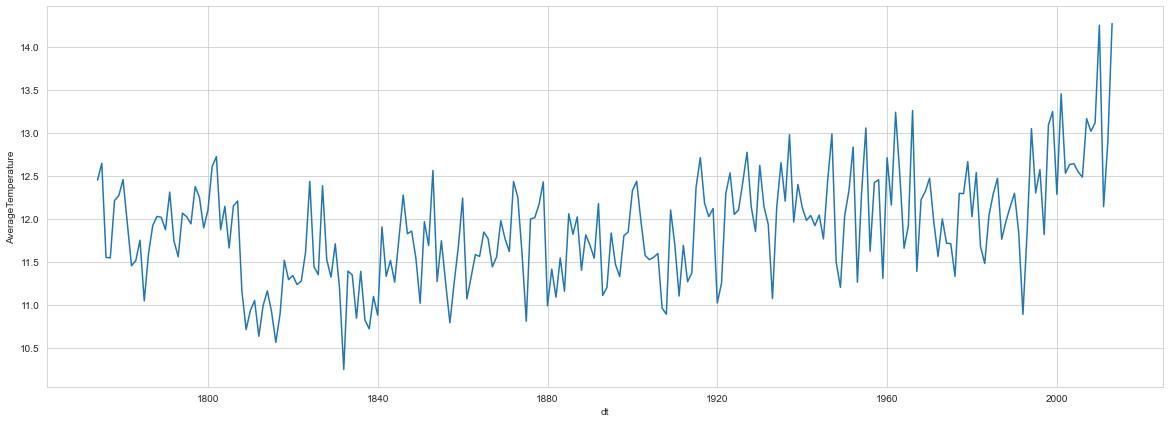

In [187]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid") 

sns.lineplot(data= data_tr_ant_means, x="dt",y="AverageTemperature")

In [166]:
data_tr_izmir = data_tr[data_tr["City"] == "Izmir"]
data_tr_izmir

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
3303301,1753-01-01,8.942,5.029,Izmir,Turkey,37.78N,26.44E,1753
3303302,1753-02-01,8.501,2.882,Izmir,Turkey,37.78N,26.44E,1753
3303303,1753-03-01,13.023,2.771,Izmir,Turkey,37.78N,26.44E,1753
3303304,1753-04-01,14.909,4.732,Izmir,Turkey,37.78N,26.44E,1753
3303305,1753-05-01,19.914,2.015,Izmir,Turkey,37.78N,26.44E,1753
...,...,...,...,...,...,...,...,...
3306424,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E,2013
3306425,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E,2013
3306426,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E,2013
3306427,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E,2013


In [167]:
data_tr_izmir.groupby(by="City")["AverageTemperature","AverageTemperatureUncertainty"].agg(["min","mean","max"])

AverageTemperature                    AverageTemperatureUncertainty  \
                     min       mean     max                           min   
City                                                                        
Izmir              5.607  17.278065  29.845                         0.062   

                       
          mean    max  
City                   
Izmir  1.41737  8.459

In [168]:
data_tr_izmir_means = data_tr_izmir.groupby(data_tr_izmir["dt"].dt.to_period("Y")).mean()
data_tr_izmir_means = data_tr_izmir_means.reset_index() 
data_tr_izmir_means["dt"] = data_tr_izmir_means["dt"].astype("str").astype("datetime64") # dtype period to datetime64
data_tr_izmir_means.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             261 non-null    datetime64[ns]
 1   AverageTemperature             261 non-null    float64       
 2   AverageTemperatureUncertainty  261 non-null    float64       
 3   Year                           261 non-null    float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 8.3 KB


<AxesSubplot:xlabel='dt', ylabel='AverageTemperature'>

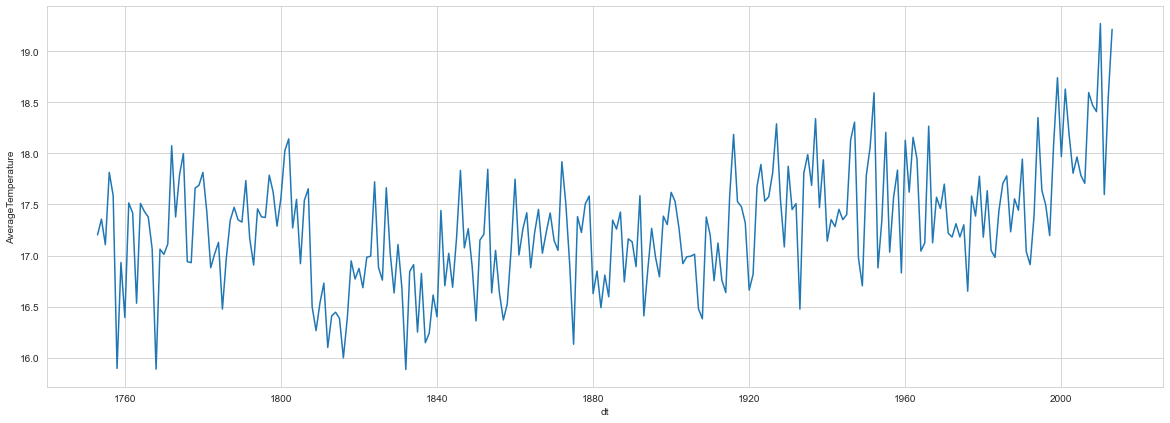

In [219]:
plt.figure(figsize=(20,7))
sns.set_style("whitegrid") 
sns.lineplot(data= data_tr_izmir_means, x="dt",y="AverageTemperature")

In [193]:
citys = data_tr[data_tr["City"].isin(["Istanbul","Izmir","Antalya","Erzurum"])]
citys

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude,Year
329309,1774-01-01,0.034,5.410,Antalya,Turkey,37.78N,30.51E,1774
329310,1774-02-01,4.320,5.031,Antalya,Turkey,37.78N,30.51E,1774
329311,1774-03-01,6.733,2.649,Antalya,Turkey,37.78N,30.51E,1774
329312,1774-04-01,12.666,3.803,Antalya,Turkey,37.78N,30.51E,1774
329313,1774-05-01,19.183,2.073,Antalya,Turkey,37.78N,30.51E,1774
...,...,...,...,...,...,...,...,...
3306424,2013-04-01,16.643,0.337,Izmir,Turkey,37.78N,26.44E,2013
3306425,2013-05-01,21.723,0.407,Izmir,Turkey,37.78N,26.44E,2013
3306426,2013-06-01,24.416,0.589,Izmir,Turkey,37.78N,26.44E,2013
3306427,2013-07-01,26.451,0.277,Izmir,Turkey,37.78N,26.44E,2013


In [194]:
citys_means = citys.groupby([citys["dt"].dt.to_period("Y"),"City"]).mean()
citys_means = citys_means.reset_index() 
citys_means["dt"] = citys_means["dt"].astype("str").astype("datetime64")
citys_means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   dt                             984 non-null    datetime64[ns]
 1   City                           984 non-null    object        
 2   AverageTemperature             984 non-null    float64       
 3   AverageTemperatureUncertainty  984 non-null    float64       
 4   Year                           984 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 38.6+ KB


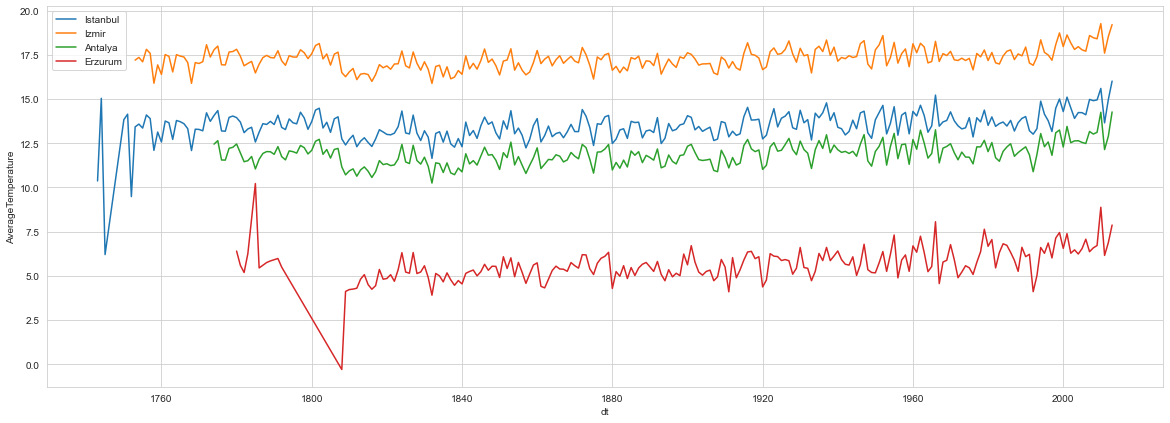

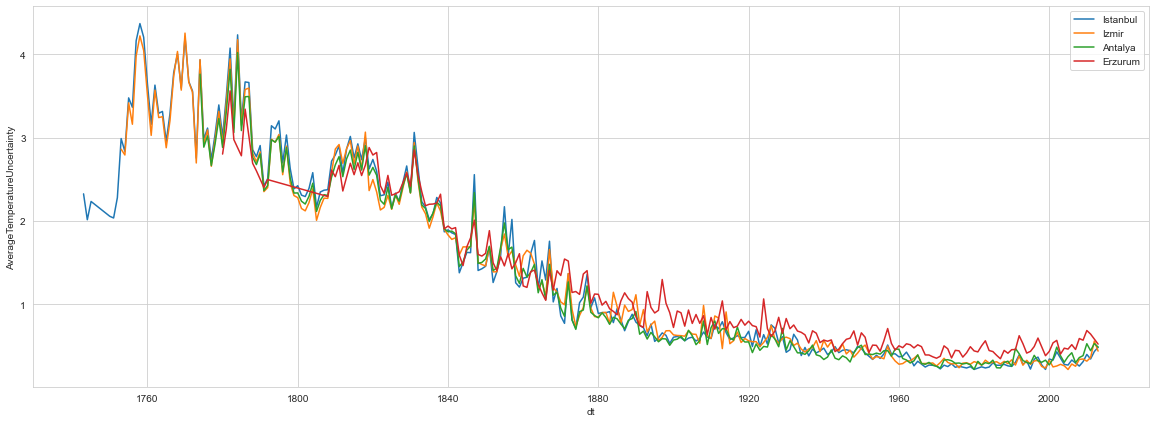

In [196]:
for col in citys_means.columns[2:4]:
    sns.set_style("whitegrid") 
    plt.figure(figsize=(20,7))

    for city in citys_means["City"].unique():
        data = citys_means[citys_means["City"]== city ]
        sns.lineplot(data = data, x="dt", y=col)

        plt.legend(citys_means["City"].unique())
    plt.show()